# Github

In [ ]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759 (from 1)
Receiving objects: 100% (759/759), 5.39 MiB | 39.39 MiB/s, done.
Resolving deltas: 100% (408/408), done.
/kaggle/working/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 14.9 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214820 sha256=6cad8db5b9139cf2080e7d8ec6145b55b57517e47c1951abf79aefade1b085f7
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built ba

# Image

Image downloaded successfully and saved as 'downloaded_image.jpg'


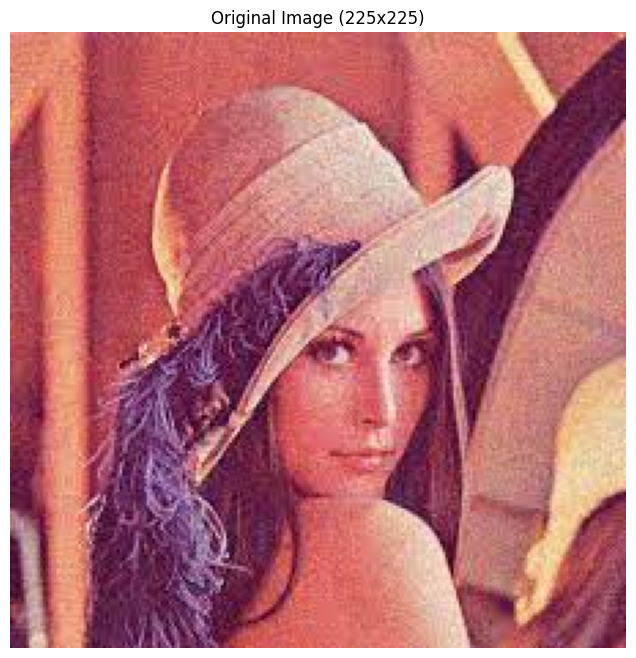

In [ ]:
import requests
import os
import matplotlib.pyplot as plt
from PIL import Image

# Create the directory if it doesn't exist
os.makedirs('/content/photos', exist_ok=True)

# Replace this URL with the direct link to the image you want to download
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqdHBuQ0G6nna4ZtiU2w6QB7yAAYirNpnIDyQpcGWp5vRNBDMYaT7OAk9zU6F7JLyHTiE&usqp=CAU"

# Send a GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Define the path to save the image
    image_path = "/content/photos/downloaded_image.jpg"

    # Open a file in binary write mode and save the image
    with open(image_path, "wb") as file:
        file.write(response.content)
    print("Image downloaded successfully and saved as 'downloaded_image.jpg'")
else:
    print("Failed to download image. Status code:", response.status_code)

# Load the image
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# Display the image
plt.figure(figsize=(8, 8))  # Set the figure size
plt.imshow(image)
plt.axis('off')  # Hide axes

# Set the title to include the dimensions
plt.title(f'Original Image ({width}x{height})')  # Title with dimensions
plt.show()  # Show the image

# Model

In [ ]:
# Step 1: Define the path to the file
file_path = '/usr/local/lib/python*/dist-packages/basicsr/data/degradations.py'

# Step 2: Read the file and modify the import statement
with open(file_path, 'r') as file:
    lines = file.readlines()

# Step 3: Modify the specific line
for i, line in enumerate(lines):
    if "from torchvision.transforms.functional_tensor import rgb_to_grayscale" in line:
        lines[i] = line.replace("from torchvision.transforms.functional_tensor import rgb_to_grayscale", "from torchvision.transforms.functional import rgb_to_grayscale")

# Step 4: Write the modified lines back to the file
with open(file_path, 'w') as file:
    file.writelines(lines)

print("Import statement modified successfully.")

Import statement modified successfully.


In [ ]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i /content/photos --outscale 3.5 --face_enhance

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /kaggle/working/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100%|███████████████████████████████████████| 63.9M/63.9M [00:00<00:00, 276MB/s]
/kaggle/working/Real-ESRGAN/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights

# Result

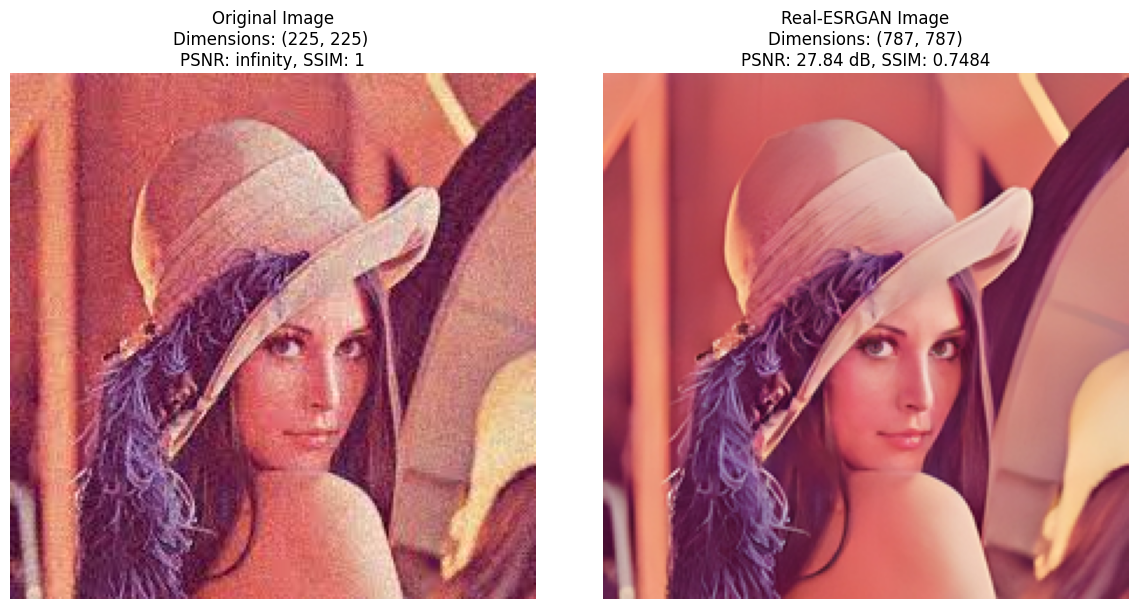

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Define the paths to the images
image_path_downloaded = "/content/photos/downloaded_image.jpg"
image_path_model = "/content/Real-ESRGAN/results/downloaded_image_out.jpg"

# Load the images
image_downloaded = Image.open(image_path_downloaded).convert("RGB")  # Ensure image is in RGB format
image_model = Image.open(image_path_model).convert("RGB")  # Ensure image is in RGB format

original_dim = image_model.size

# Resize images to match dimensions if they differ
if image_downloaded.size != image_model.size:
    image_model = image_model.resize(image_downloaded.size, Image.LANCZOS)

# Convert images to numpy arrays
image_downloaded_np = np.array(image_downloaded, dtype=np.float32) / 255.0  # Normalize to [0, 1]
image_model_np = np.array(image_model, dtype=np.float32) / 255.0  # Normalize to [0, 1]

# Determine valid SSIM window size
min_dim = min(image_downloaded_np.shape[:2])
win_size = min(7, min_dim) if min_dim >= 7 else min_dim

# Compute PSNR and SSIM
psnr_value = psnr(image_downloaded_np, image_model_np, data_range=1.0)
ssim_value = ssim(image_downloaded_np, image_model_np, data_range=1.0, channel_axis=-1, win_size=win_size)

# Get image dimensions
downloaded_size = image_downloaded.size  # (width, height)
model_size = image_model.size  # (width, height)

# Display the images
plt.figure(figsize=(12, 6))  # Set the figure size

# Display downloaded image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_downloaded)
plt.title(f'Original Image\nDimensions: {downloaded_size} \nPSNR: infinity, SSIM: 1')  # Title with dimensions
plt.axis('off')  # Hide axes

# Display model image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(image_model)
plt.title(f'Real-ESRGAN Image\nDimensions: {original_dim}\nPSNR: {psnr_value:.2f} dB, SSIM: {ssim_value:.4f}')  # Title with metrics
plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout
plt.show()  # Show the images
